In [1]:
"""this is me going back to a code i wrote ages ago and messing with it see slic3 for version of this i wrote at the time"""

from helpers import normalise,mean,std,get_roi,get_contour_for_label,getContours
import cv2
from skimage.segmentation import slic
import matplotlib.pyplot as plt
import numpy as np
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
from skimage import io
from square import get_corners,get_slice
import time
from scipy.spatial import distance
from histogram_distances import get_hist,get_roi_hist,create_hists,combine_hists,get_distances,get_pixel_count
from skimage import feature


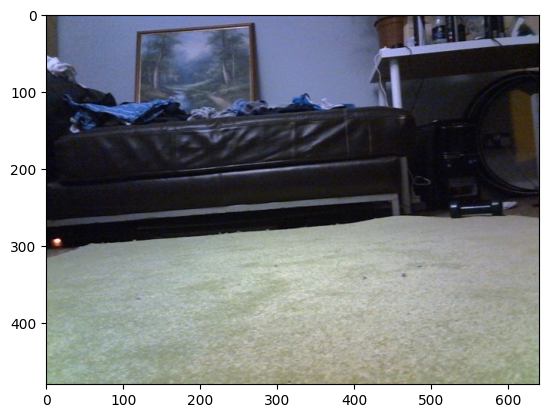

In [2]:
rgb = cv2.imread('roboview.jpg')
(height,width,_) = rgb.shape

rgb = cv2.cvtColor(rgb,cv2.COLOR_BGR2RGB)

rgb_small = cv2.resize(rgb,(width,height),interpolation= cv2.INTER_LINEAR)
hsv_small = cv2.cvtColor(rgb_small,cv2.COLOR_RGB2HSV)
lab_small = cv2.cvtColor(rgb_small,cv2.COLOR_RGB2LAB)
gray_small = cv2.cvtColor(rgb_small,cv2.COLOR_RGB2GRAY)



#image_for_thresholding = hsv_small
#image_for_thresholding = lab_small
image_for_thresholding = rgb_small
image_for_slic = rgb_small

plt.imshow(rgb_small)


In [3]:
segments_slic = slic(rgb_small, n_segments=100, compactness=10, sigma=1,start_label=0,convert2lab=True)


In [4]:
segments_slic.dtype

dtype('int64')

In [17]:


all_labels = np.unique(segments_slic)
print(np.unique(all_labels))

roi_labels = get_roi(image_for_thresholding,segments_slic,(45,90),(65,99))


segments_hists = create_hists(all_labels,segments_slic,image_for_thresholding,get_hist)
#roi_hist = get_roi_hist(roi_labels,segments_slic,image_for_thresholding)
roi_hist = segments_hists[roi_labels[0]]
segments_hists.shape
roi_hists = segments_hists[roi_labels]







[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]


255.0


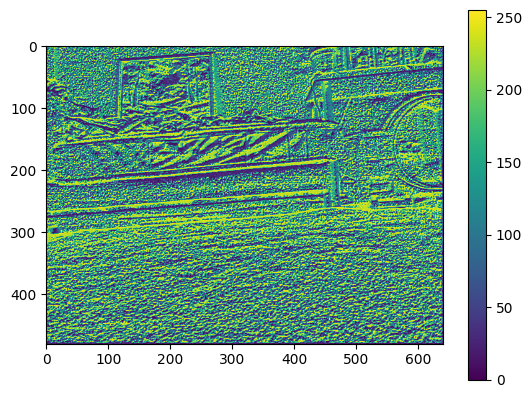

153.39548
161.42934
417.20233
252.07878
227.89317
450.21985
92.63243
208.55399
507.2097
324.62137
579.9874
441.8025
272.5015
304.86273
156.65475
174.64468
272.58206
329.49588
217.66652
149.19864
314.00342
260.26544
198.87787
188.31221
476.27905
477.7605
276.50766
243.10208
228.06236
244.19714
213.23462
292.75732
293.22305
281.14703
180.56427
275.1045
211.32768
247.2103
265.51428
289.08405
314.3247
483.52573
358.45975
529.35095
411.79626
243.42316
440.3249
471.40665
576.3603
588.8818
311.6672
320.11118
476.77185
311.77267
421.39917
350.41824
388.86078
324.8502
381.29913
433.49014
261.66953
329.7317
337.08853
305.9761
293.12976
277.9252
248.94652
269.71027
254.58563
275.1866
282.61267
335.86008
239.00414
248.61075
260.8548
325.65372
303.85754
343.1124
311.87814
273.3907
355.69275
276.75674
306.9953
315.07693
325.88403
270.81985
302.75952
357.3478
312.72482
334.2764
401.56863
392.50427
395.0279
397.75574
492.83423
475.05154
[32.25566   19.62966    9.0005     7.0853863 11.088216  18.991013

In [19]:
lbp = feature.local_binary_pattern(gray_small,8,2)
print(lbp.max())
plt.imshow(lbp)
plt.colorbar()
plt.show()

def create_lbp_hist(label,segments_slic,lbp):
  (hist,_) = np.histogram(lbp)
  hist = hist.astype('float32')
  pixel_count = get_pixel_count(label,segments_slic)
  hist = hist/pixel_count
  print(hist.sum())
  #hist/=hist.sum()+1e-7
  return hist

lbp_hists = create_hists(all_labels,segments_slic,image_for_thresholding,create_lbp_hist)
print(lbp_hists[0])
lbp_roi_hists = lbp_hists[roi_labels]

segments_hists = np.concatenate((segments_hists,lbp_hists),axis=1)
roi_hists = np.concatenate((roi_hists,lbp_roi_hists),axis=1)
roi_hist = roi_hists.sum(axis=0)/roi_hists.shape[0]





In [20]:
distances = get_distances(roi_hist,segments_hists)

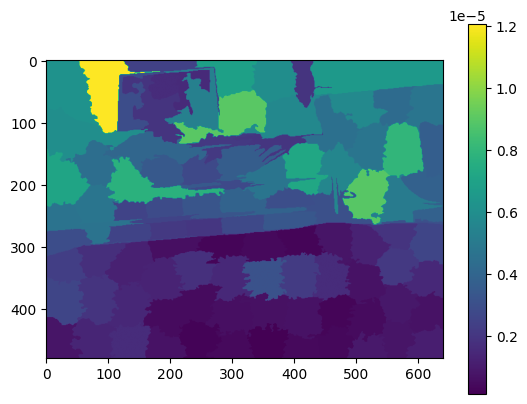

In [21]:

ssd_image = np.take(distances,segments_slic)
plt.imshow(ssd_image)
plt.colorbar()
